In [1]:
import csv
import string
import pandas as pd

In [2]:
train = pd.read_csv('SwearSentimentStemmed.csv', comment='#')
train = train.drop([train.columns[0]] ,  axis=1)

In [3]:
train.head()

,Insult,Comment,Sentiment,Swear_Ratio
0,1,you fuck your dad,-0.400000,0.25
1,0,i realli dont understand your pointxa0 it seem...,0.000000,0.00
2,0,axc2xa0major of canadian can and ha been wrong...,0.283333,0.00
3,0,listen if you dont wanna get marri to a man or...,0.450000,0.00
4,0,cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1...,0.000000,0.00


In [4]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
def evaluation(Y_test, Y_pred, Y_pred_proba, model):
    print ("For model: " + model)
    print ("Accuracy is ", accuracy_score(y_test, y_pred)*100)
    print(precision_recall_fscore_support(Y_test, Y_pred, average='micro'))    
    print(classification_report(Y_test, Y_pred, target_names=['1', '0']))
    print(accuracy_score(Y_test, Y_pred))
    precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_proba, pos_label= 1)
    plt.plot(precision, recall)
    plt.title(model+ " for insults")
    plt.show()
    precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_proba, pos_label=0)
    plt.plot(precision, recall)
    plt.title(model+ " for not insults")
    plt.show()


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = "english")
tfidf.fit(train['Comment'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [6]:
X = tfidf.transform(train['Comment'])
train['Comment'][0]

'you fuck your dad'

In [7]:
print([X[0, tfidf.vocabulary_['fuck']]])

[0.4710891098078048]


In [8]:
from sklearn.model_selection import train_test_split
X = train.drop('Insult', axis=1)
y = train['Insult']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [9]:
print("Train set has total {0} entries with {1:.2f}% not insults, {2:.2f}% insults".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 2960 entries with 73.65% not insults, 26.35% insults


In [10]:
import numpy as np
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA
vect_word = TfidfVectorizer(max_features = 20000, dtype=np.float32, analyzer='word', stop_words = "english", ngram_range=(1, 3))
tr_vect = vect_word.fit_transform(train['Comment'])
transformer = SparsePCA(n_components=2, normalize_components=True,random_state=0)
transformer.fit(tr_vect.toarray())
new_tr_vect = transformer.transform(tr_vect.toarray())

print(new_tr_vect.shape)

(3947, 2)


In [11]:
# vect_word_uni = TfidfVectorizer(max_features = 20000, dtype=np.float32, analyzer='word', stop_words = "english", ngram_range=(1, 1))
# vect_word_bi = TfidfVectorizer(max_features = 20000, dtype=np.float32, analyzer='word', stop_words = "english", ngram_range=(2, 2))
# vect_word_tri = TfidfVectorizer(max_features = 20000, dtype=np.float32, analyzer='word', stop_words = "english", ngram_range=(3, 3))
# tr_vect_uni = vect_word_uni.fit_transform(train['Comment'])
# tr_vect_bi = vect_word_bi.fit_transform(train['Comment'])
# tr_vect_tri = vect_word_tri.fit_transform(train['Comment'])
# transformer1 = SparsePCA(n_components=3, normalize_components=True,random_state=0)
# transformer1.fit(tr_vect_uni.toarray())
# transformer2 = SparsePCA(n_components=3, normalize_components=True,random_state=0)
# transformer2.fit(tr_vect_bi.toarray())
# transformer3 = SparsePCA(n_components=3, normalize_components=True,random_state=0)
# transformer3.fit(tr_vect_tri.toarray())
# new_tr_vect_uni = transformer1.transform(tr_vect_uni.toarray())
# new_tr_vect_bi = transformer2.transform(tr_vect_bi.toarray())
# new_tr_vect_tri = transformer3.transform(tr_vect_tri.toarray())
# X_1 = np.concatenate((new_tr_vect_uni, new_tr_vect_bi), axis=1)
# X_2 = np.concatenate((X_1, new_tr_vect_tri), axis=1)
# X = np.concatenate((X_2, temp), axis=1)

In [12]:
temp = train.drop(['Insult', 'Comment'] , axis = 1)
X = np.concatenate((temp, new_tr_vect), axis = 1)
y = train.Insult
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

For model: Decision Tree
Accuracy is  74.00843881856541
(0.740084388185654, 0.740084388185654, 0.740084388185654, None)
              precision    recall  f1-score   support

           1       0.79      0.88      0.83       862
           0       0.53      0.36      0.43       323

   micro avg       0.74      0.74      0.74      1185
   macro avg       0.66      0.62      0.63      1185
weighted avg       0.72      0.74      0.72      1185

0.740084388185654


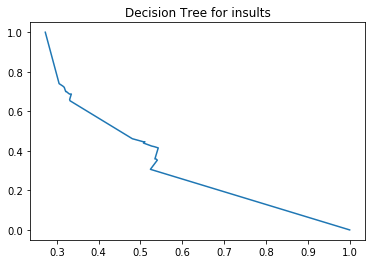

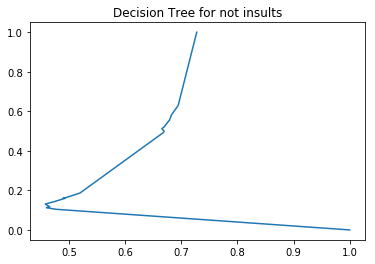

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "Decision Tree")

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

For model: Logistic Regression
Accuracy is  76.70886075949367
(0.7670886075949367, 0.7670886075949367, 0.7670886075949367, None)
              precision    recall  f1-score   support

           1       0.78      0.95      0.86       862
           0       0.67      0.29      0.41       323

   micro avg       0.77      0.77      0.77      1185
   macro avg       0.72      0.62      0.63      1185
weighted avg       0.75      0.77      0.73      1185

0.7670886075949367


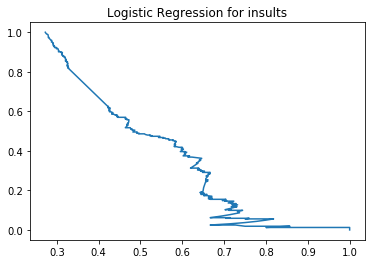

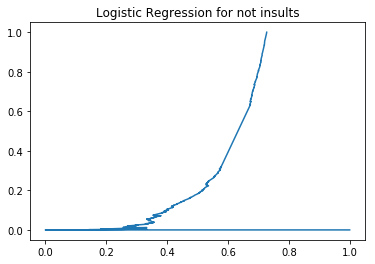

In [15]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
pred_proba = logreg.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "Logistic Regression")

For model: Logistic Regression
Accuracy is  75.10548523206751
(0.7510548523206751, 0.7510548523206751, 0.7510548523206751, None)
              precision    recall  f1-score   support

           1       0.79      0.90      0.84       862
           0       0.57      0.37      0.44       323

   micro avg       0.75      0.75      0.75      1185
   macro avg       0.68      0.63      0.64      1185
weighted avg       0.73      0.75      0.73      1185

0.7510548523206751


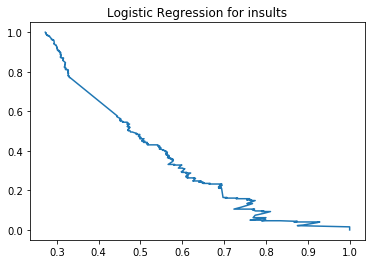

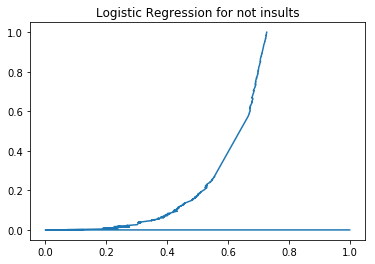

In [25]:
evaluation(y_test, y_pred, pred_proba, "Logistic Regression")

In [16]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
   confusion_matrix(y_test, y_pred),
   columns=['Predicted Not Bully', 'Predicted Bully'],
   index=['True Not Bully', 'Bully']
)

,Predicted Not Bully,Predicted Bully
True Not Bully,815,47
Bully,229,94


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For model: SVM
Accuracy is  75.27426160337552
(0.7527426160337553, 0.7527426160337553, 0.7527426160337553, None)
              precision    recall  f1-score   support

           1       0.75      0.98      0.85       862
           0       0.73      0.15      0.25       323

   micro avg       0.75      0.75      0.75      1185
   macro avg       0.74      0.56      0.55      1185
weighted avg       0.75      0.75      0.69      1185

0.7527426160337553


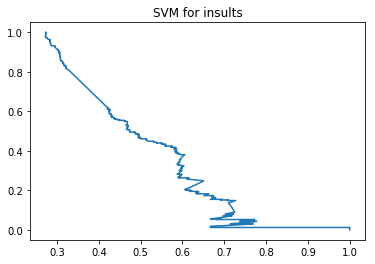

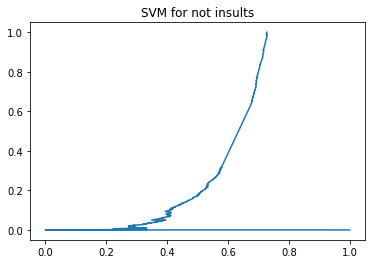

In [17]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf', probability=True)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)
pred_proba = svclassifier.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "SVM")

For model: KNeighbors Classifier
Accuracy is  74.68354430379746
(0.7468354430379747, 0.7468354430379747, 0.7468354430379747, None)
              precision    recall  f1-score   support

           1       0.79      0.89      0.84       862
           0       0.56      0.36      0.44       323

   micro avg       0.75      0.75      0.75      1185
   macro avg       0.67      0.63      0.64      1185
weighted avg       0.72      0.75      0.73      1185

0.7468354430379747


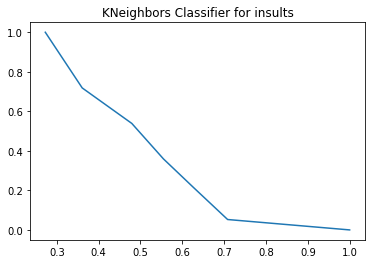

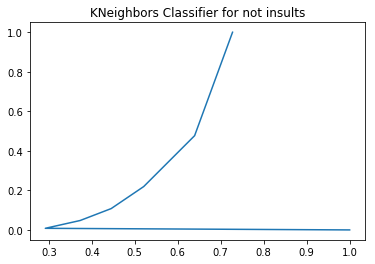

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
pred_proba = neigh.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "KNeighbors Classifier")

For model: Gaussian Naive Bayes
Accuracy is  76.03375527426161
(0.760337552742616, 0.760337552742616, 0.760337552742616, None)
              precision    recall  f1-score   support

           1       0.78      0.94      0.85       862
           0       0.63      0.29      0.40       323

   micro avg       0.76      0.76      0.76      1185
   macro avg       0.71      0.61      0.62      1185
weighted avg       0.74      0.76      0.73      1185

0.760337552742616


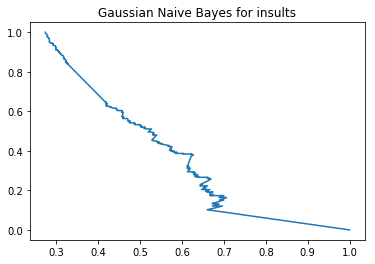

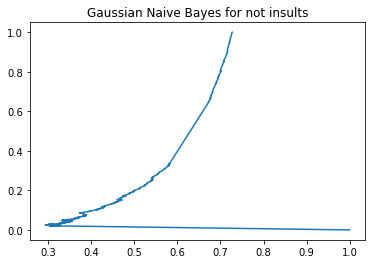

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
pred_proba = gnb.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "Gaussian Naive Bayes")

For model: Random Forest Classifier
Accuracy is  75.78059071729957
(0.7578059071729958, 0.7578059071729958, 0.7578059071729958, None)
              precision    recall  f1-score   support

           1       0.77      0.95      0.85       862
           0       0.66      0.24      0.35       323

   micro avg       0.76      0.76      0.76      1185
   macro avg       0.71      0.59      0.60      1185
weighted avg       0.74      0.76      0.71      1185

0.7578059071729958


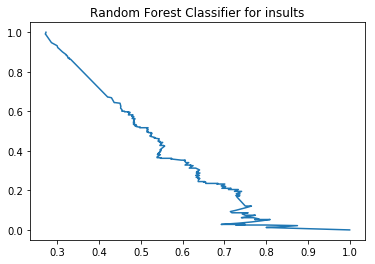

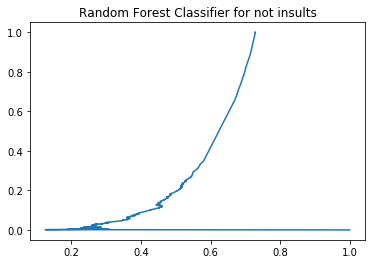

In [20]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)
pred_proba = randomForest.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "Random Forest Classifier")

For model: Extra Trees Classifier
Accuracy is  75.10548523206751
(0.7510548523206751, 0.7510548523206751, 0.7510548523206751, None)
              precision    recall  f1-score   support

           1       0.75      0.98      0.85       862
           0       0.76      0.13      0.22       323

   micro avg       0.75      0.75      0.75      1185
   macro avg       0.75      0.56      0.53      1185
weighted avg       0.75      0.75      0.68      1185

0.7510548523206751


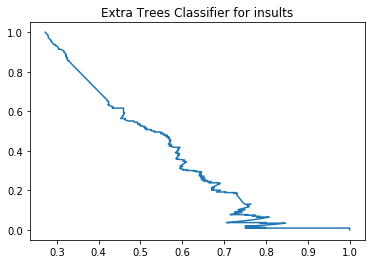

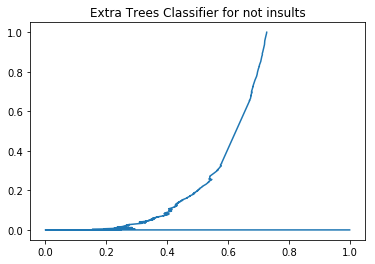

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
extraTrees = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=0)
extraTrees.fit(X_train, y_train)
y_pred = extraTrees.predict(X_test)
pred_proba = extraTrees.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "Extra Trees Classifier")

For model: Bagging Classifier
Accuracy is  74.68354430379746
(0.7468354430379747, 0.7468354430379747, 0.7468354430379747, None)
              precision    recall  f1-score   support

           1       0.76      0.96      0.85       862
           0       0.63      0.17      0.27       323

   micro avg       0.75      0.75      0.75      1185
   macro avg       0.69      0.57      0.56      1185
weighted avg       0.72      0.75      0.69      1185

0.7468354430379747


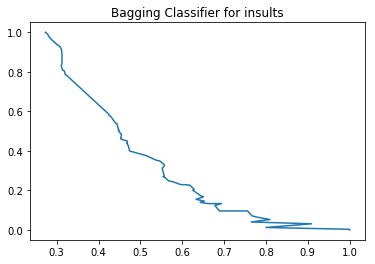

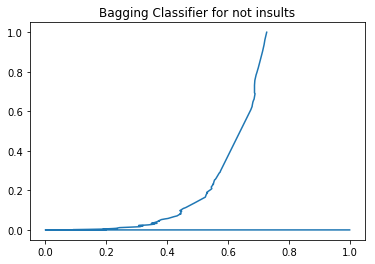

In [22]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
pred_proba = bagging.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "Bagging Classifier")

For model: AdaBoost Classifier
Accuracy is  75.69620253164557
(0.7569620253164557, 0.7569620253164557, 0.7569620253164557, None)
              precision    recall  f1-score   support

           1       0.79      0.92      0.85       862
           0       0.60      0.33      0.43       323

   micro avg       0.76      0.76      0.76      1185
   macro avg       0.69      0.62      0.64      1185
weighted avg       0.73      0.76      0.73      1185

0.7569620253164557


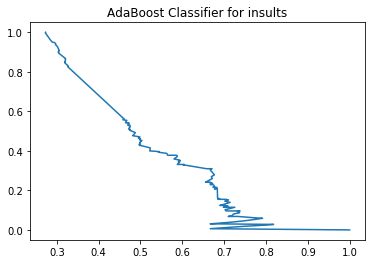

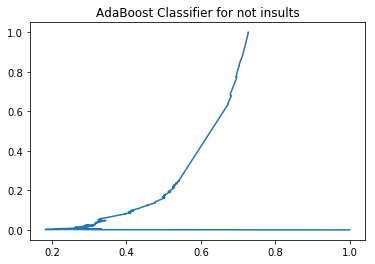

In [23]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
pred_proba = ada.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "AdaBoost Classifier")

For model: XGB Classifier
Accuracy is  75.10548523206751
(0.7510548523206751, 0.7510548523206751, 0.7510548523206751, None)
              precision    recall  f1-score   support

           1       0.79      0.90      0.84       862
           0       0.57      0.37      0.44       323

   micro avg       0.75      0.75      0.75      1185
   macro avg       0.68      0.63      0.64      1185
weighted avg       0.73      0.75      0.73      1185

0.7510548523206751


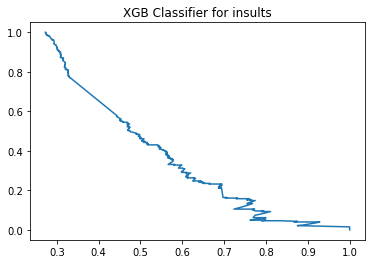

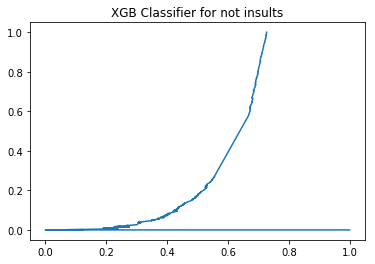

In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000, objective='binary:logistic', gamma=0.1, subsample=0.5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
pred_proba = xgb.predict_proba(X_test)
pred_proba  = pred_proba[:, 1]
evaluation(y_test, y_pred, pred_proba, "XGB Classifier")